In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [34]:
import random
N = 1000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0,N):
    ad = 0
    max_random = 0
    for i in range(0,d):
        random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)
        print(random_beta)
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    #print(reward)
    if(reward ==1):
        numbers_of_rewards_1[ad] =numbers_of_rewards_1[ad]+1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad]+1
    total_reward = total_reward + reward
    

            
        
            


0.002388454770657134
0.03582231410675784
0.0017136481780004528
0.7198658826598086
0.12165357024804177
0.9171261765517835
0.1427278269585899
0.15292739393959454
0.9890802127885944
0.36099832277162586
0.5212208226160068
0.3661386489737247
0.7724551291639786
0.7604588218784052
0.37308099552235424
0.8403023462265043
0.45588635178807774
0.24782110321453021
0.9760284887898819
0.8926505386107321
0.8738207241769975
0.6178077354927027
0.7786453117937082
0.8163081883075378
0.7255115115359746
0.8503284635824314
0.5093517233363104
0.8376209596633283
0.8764192917230977
0.6866628452079329
0.16239355131467226
0.2870267136129055
0.07940205640023291
0.9941636657392626
0.30200165725976746
0.9335971970056892
0.41641541996679804
0.6232774829942509
0.7625897357252829
0.11743525641223274
0.25634547948090947
0.15709843395625553
0.1454696812218654
0.03710535143095882
0.7309891622034601
0.2805447086122725
0.0175819975865017
0.3430741363334123
0.6589487234136531
0.7376528326782443
0.26551856081174297
0.92843395

In [10]:
#visualising the results (thompson sampling)

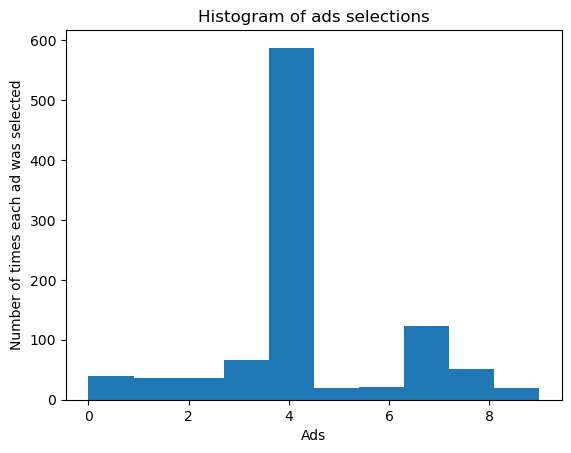

In [18]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [77]:
#modified code version
import random
import numpy as np
import pandas as pd

# Assuming 'dataset' is already loaded as a Pandas DataFrame
# dataset = pd.read_csv('your_dataset.csv')

N = 1000  # Number of rounds (iterations)
d = 10    # Number of ads (arms)
ads_selected = []
numbers_of_rewards_1 = [0] * d  # Number of successes for each ad
numbers_of_rewards_0 = [0] * d  # Number of failures for each ad
total_reward = 0

for n in range(N):
    # Selecting the ad using Thompson Sampling with np.argmax()
    selected_arm = np.argmax([random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1) for i in range(d)])
    # Store the selected ad
    ads_selected.append(selected_arm)

    # Get the reward from the dataset
    reward = dataset.values[n, selected_arm]

    # Update success or failure counts
    if reward == 1:
        numbers_of_rewards_1[selected_arm] += 1
    else:
        numbers_of_rewards_0[selected_arm] += 1

    # Update total reward
    total_reward += reward

# Print final total reward
print("Total Reward:", total_reward)


Total Reward: 197


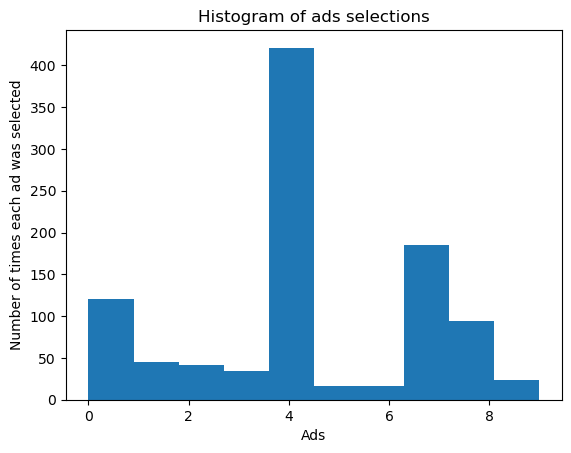

In [79]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()